In [ ]:
import pandas as pd

df = pd.read_csv('Placement_Data_Full_Class.csv')



In [2]:
display(df.head(10))

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [3]:
display(df.describe())

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


None

find out bias and find out value for the bias
So the command to run
df['column_name'].value_count() for the those columns

Bias Columns to be considered : 1. Gender 2. Work Experience 3. degree type

In [ ]:
display(df['gender'].value_counts())
print("+" * 50)
display(df['workex'].value_counts())
print("+" * 50)
display(df['degree_t'].value_counts())
 

gender
M    139
F     76
Name: count, dtype: int64

++++++++++++++++++++++++++++++++++++++++++++++++++


workex
No     141
Yes     74
Name: count, dtype: int64

++++++++++++++++++++++++++++++++++++++++++++++++++


degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64

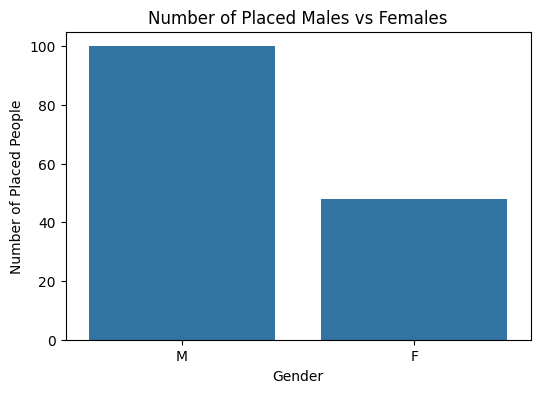

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
placed_df = df[df['status'] == 'Placed']
gender_counts = placed_df['gender'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Number of Placed Males vs Females')
plt.xlabel('Gender')
plt.ylabel('Number of Placed People')
plt.show()

 

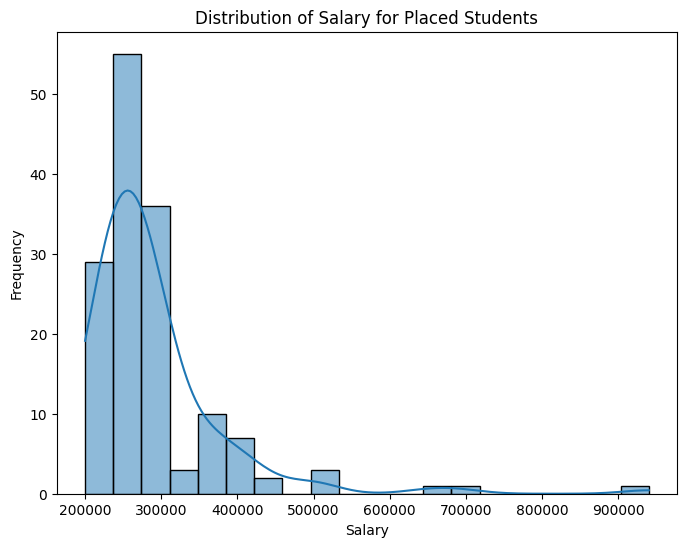

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Filter for placed students
placed_df = df[df['status'] == 'Placed'].copy()
# Plot the distribution of salary for placed students
plt.figure(figsize=(8, 6))
sns.histplot(placed_df['salary'], kde=True, bins=20)
plt.title('Distribution of Salary for Placed Students')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()
 

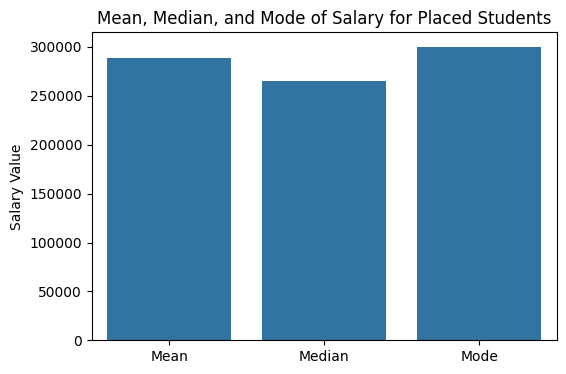

In [ ]:
# Calculate mean, median, and mode of salary for placed students
mean_salary = placed_df['salary'].mean()
median_salary = placed_df['salary'].median()
mode_salary = placed_df['salary'].mode()[0] # mode() can return multiple values, take the first one

# Create a bar plot for mean, median, and mode
labels = ['Mean', 'Median', 'Mode']
values = [mean_salary, median_salary, mode_salary]

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=values)
plt.title('Mean, Median, and Mode of Salary for Placed Students')
plt.ylabel('Salary Value')
plt.show()
 --